In [1]:
#!/usr/bin/env python
"""Takes random sample of 50 galaxies from gals and plots:

* Positions (x,y only) of Centrals, Satelittes and Orphans

"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

# Use funciton 'Random_Sample_Gals' to generate a random sample of galaxies for our catalogue
snapshot_used = 250
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
selected_gal_properties = gals.sample(n=100)
#Randomly select n rows.
#print(selected_gal_properties)

In [2]:
# Get the galaxy properties from the random sample of galaxy IDs
HIMass_randsam = selected_gal_properties["HIMass"]# Hydrogen Mass
Type_randsam = selected_gal_properties["Type"]# Galaxy type (Central, Satellite, Orphan)
HaloID_randsam = selected_gal_properties["HaloID"]# Halo ID
HaloMass_randsam = selected_gal_properties["Mvir"]# Halo Mass
StellarMass_randsam = selected_gal_properties["StellarMass"]# Stellar Mass
Sfr_randsam = selected_gal_properties["Sfr"]# Star formation rate
Pos_x = selected_gal_properties["Pos_0"] # x coord of galaxy position
Pos_y = selected_gal_properties["Pos_1"] # y coord of galaxy position

print('Type_randsam = ', Type_randsam)

Type_randsam =  648750     2
873166     0
687363     0
498580     1
1264664    0
          ..
84957      2
1370580    0
1102513    0
354247     0
45148      2
Name: Type, Length: 100, dtype: int32


In [3]:
# find the minimum and maximum values in each array (apart from Pos, as a list of arrays)

Type_min = min(Type_randsam)
Type_max = max(Type_randsam)

HIMass_min = min(HIMass_randsam)
HIMass_max = max(HIMass_randsam)

HaloID_min = min(HaloID_randsam)
HaloID_max = max(HaloID_randsam)

HaloMass_min = min(HaloMass_randsam)
HaloMass_max = max(HaloMass_randsam)

StellarMass_min = min(StellarMass_randsam)
StellarMass_max = max(StellarMass_randsam)

Sfr_min = min(Sfr_randsam)
Sfr_max = max(Sfr_randsam)

# Calc length of array (should be 50) or num. defined when selected Galaxy IDs
Type_len = len(Type_randsam)

# TEST
print('Type_min =', Type_min)
print('Type_max =', Type_max)
print('Type_rand =', Type_randsam)
print('Type_len =', Type_len)


Type_min = 0
Type_max = 2
Type_rand = 648750     2
873166     0
687363     0
498580     1
1264664    0
          ..
84957      2
1370580    0
1102513    0
354247     0
45148      2
Name: Type, Length: 100, dtype: int32
Type_len = 100


In [4]:
# Print Samples to a txt file

orig_stdout = sys.stdout
sys.stdout = open("Random_Sample_Galaxies.txt","w+")

print('\n***************************************')
print('All the minimum and maximum information from catalogue variables\n')
print('\n\t\tMinimum value:\t\tMaximum value:')
print('\nType:\t\t', Type_min, '\t\t\t', Type_max)
print('\nHIMass:\t\t', HIMass_min, '\t\t\t', HIMass_max)
print('\nHaloID:\t\t', HaloID_min, '\t\t\t', HaloID_max)
print('\nHaloMass:\t', HaloMass_min, '\t\t', HaloMass_max)
print('\nStellarMass:\t', StellarMass_min, '\t\t\t', StellarMass_max)
print('\nSfr:\t\t', Sfr_min, '\t\t\t', Sfr_max)

# Print the information to see what we are looking at 
#print('\nType variable LENGTH : ', type_len)
print('\n***************************************')
print('\nAll the information from random Samples\n')
print('Type Random Sample : \n', Type_randsam)

#print('\nHIMass variable LENGTH : ', HIMass_len)
print('\nHIMass Random Sample : \n', HIMass_randsam)

#print('\nHaloID variable LENGTH : ', HaloID_len)
print('\nHaloID Random Sample : \n', HaloID_randsam)

#print('\nHaloMass variable LENGTH : ', HaloMass_len)
print('\nHaloMass Random Sample : \n', HaloMass_randsam)

#print('\nStellarMass variable LENGTH : ', StellarMass_len)
print('\nStellarMass Random Sample : \n', StellarMass_randsam)

#print('\nSfr variable LENGTH : ', Sfr_len)
print('\nSfr Random Sample : \n', Sfr_randsam)

#print('\nPos variable LENGTH : ', Pos_len)
#print('\nPos Random Sample : ', Pos_randsam) #uncomment if needed but large sample so clogs output

sys.stdout.close()
sys.stdout=orig_stdout 

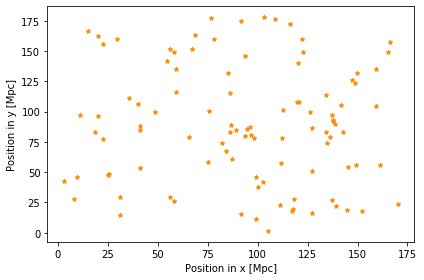

In [5]:
fig, ax = plt.subplots(1, 1)
# giving a title to my graph 
#plt.title('2D Plot of Galaxy Positions for 100 randomly\nsampled Galaxies in redshift 0') 
  
# x axis values 
x = Pos_x
# corresponding y axis values 
y = Pos_y
  
# plotting the points
plt.scatter(x, y, color= "darkorange", marker= "*", s=20)   

# naming the x axis 
plt.xlabel('Position in x [Mpc]') 
# naming the y axis 
plt.ylabel('Position in y [Mpc]') 
  

# function to show the plot in a clean format
plt.tight_layout()
# save the plot 

name_of_plot=("2D_Galaxy_Positions_50_randsam_z_0")
plt.savefig("plots/" + name_of_plot + ".pdf")



Type_rand = 648750     2
873166     0
687363     0
498580     1
1264664    0
          ..
84957      2
1370580    0
1102513    0
354247     0
45148      2
Name: Type, Length: 100, dtype: int32
Num Centrals =  58
Num Satellites =  18
Num Orphans =  24


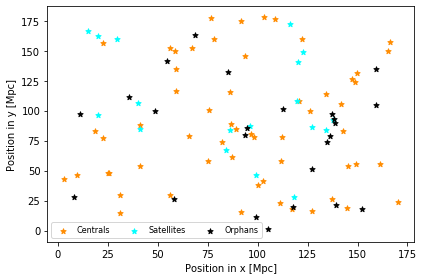

In [7]:
# Now lets try and separately plot the different types of galaxies
# Central (0), Satelitte (1) and Orphan (2)
fig, ax = plt.subplots(1, 1)


# plotting the points
centrals_plt = plt.scatter(x[Type_randsam==0], y[Type_randsam==0], color= "darkorange", marker= "*", s=30)  
satellites_plt = plt.scatter(x[Type_randsam==1], y[Type_randsam==1], color= "cyan", marker= "*", s=30)  
orphans_plt = plt.scatter(x[Type_randsam==2], y[Type_randsam==2], color= "black", marker= "*", s=30)  

plt.legend((centrals_plt, satellites_plt, orphans_plt),
           ('Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

# naming the x axis 
plt.xlabel('Position in x [Mpc]') 
# naming the y axis 
plt.ylabel('Position in y [Mpc]') 
  
# giving a title to my graph 
#plt.title('2D Plot of Galaxy Positions for 50 randomly sampled\nGalaxies in redshift 0, with Centrals, Satellites and Orphans') 

# function to show the plot in a clean format
plt.tight_layout()

# save the plot 
name_of_plot=("2D_Galaxy_Positions_50_randsam_z_0_CenSatOrp")
plt.savefig("plots/" + name_of_plot + ".pdf")


print('Type_rand =', Type_randsam)
Type_randsam.shape
occurrences_cen = np.count_nonzero(Type_randsam == 0)
occurrences_sat = np.count_nonzero(Type_randsam == 1)
occurrences_orp = np.count_nonzero(Type_randsam == 2)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num Orphans = ', occurrences_orp)